# Home Price Predictions
Authors: Mike Divine, Kenneth Ao, Russell Frost
---



Our goal is to build a system to predict home prices in Placer County based on the home sales data in the same County in 2023.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
import graphviz

In [ ]:
#dataset

url = 'https://drive.google.com/file/d/1Y8OEKy6qnbGYbldcojWVLo1r4WIZHqx7/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)


In [ ]:
#predict 'cprice' == close price
#predictors that may have correlation: 'bedrooms', 'fbathrooms', 'pbathrooms', 'lsacres', 'lssqft', 'sqft', 'ybd', 'efeatures', 'fireplaces', 'ffireplace', 'garage', 'parking', levels', 'pool', fpool', 'patio'

predictors = ['bedrooms','sqft','fbathrooms','pbathrooms','ybd']
target = 'cprice'
closing_price = df['cprice']

#change strings to floats, rounds down
df['bedrooms'] = df['bedrooms'].astype(str).apply(lambda x: int(x[0]))

# Convert 'Under Construction' and 'New' to 2023
df['ybd'] = df['ybd'].replace(['Under Construction', 'New', 'Unknown'], '2023')
# Convert the 'ybd' column to float
df['ybd'] = df['ybd'].astype(float)

# function to format prices
def price_formatter(x, pos):
    return '${:,.0f}'.format(x)

X = df[predictors].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train, y_train)

predictions = regr.predict(X_test)

print(np.around(predictions[:10]))
print(np.around(y_test[:10]))

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", round(rmse,2))

[ 619365.  531326.  538806.  866576. 1131287.  993990.  711262.  609229.
  618437.  777423.]
[ 589000  450000  497000  612500 1775000  984000  700000  670000  585000
  750000]
Root Mean Squared Error: 192402.22


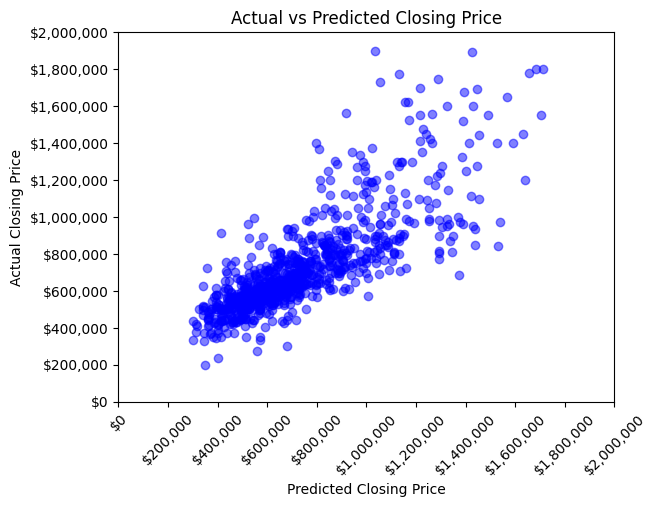

In [ ]:
plt.scatter(predictions, y_test, color='blue', alpha=0.5)
plt.xlabel('Predicted Closing Price')
plt.ylabel('Actual Closing Price')
plt.title('Actual vs Predicted Closing Price')

formatter = mticker.FuncFormatter(price_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.tick_params(axis='x', labelrotation=45)

# Setting x-axis ticks at increments of 200,000
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(200000))

# Setting y-axis ticks at increments of 200,000
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(200000))

# Setting the limits of x-axis and y-axis
plt.xlim(0, 2000000)
plt.ylim(0, 2000000)

plt.show()

#**Exploring The Data With Visializations**

---



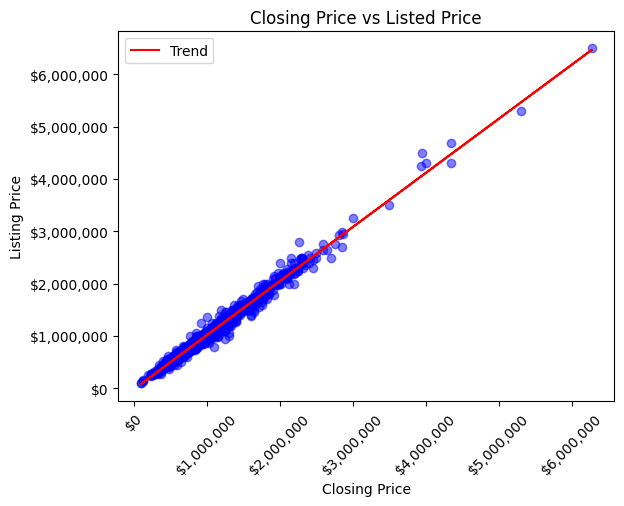

In [ ]:
closing_price = df['cprice']
listed_price = df['lprice']

model = LinearRegression()
model.fit(closing_price.values.reshape(-1,1), listed_price)
predictions_cprice_vs_lprice = model.predict(closing_price.values.reshape(-1,1))

plt.scatter(closing_price, listed_price, color='blue', alpha = 0.5)
plt.title('Closing Price vs Listed Price')
plt.xlabel('Closing Price')
plt.ylabel('Listing Price')
plt.plot(closing_price, predictions_cprice_vs_lprice, color='red', label='Trend')

formatter = mticker.FuncFormatter(price_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.tick_params(axis='x', labelrotation=45)

plt.legend()

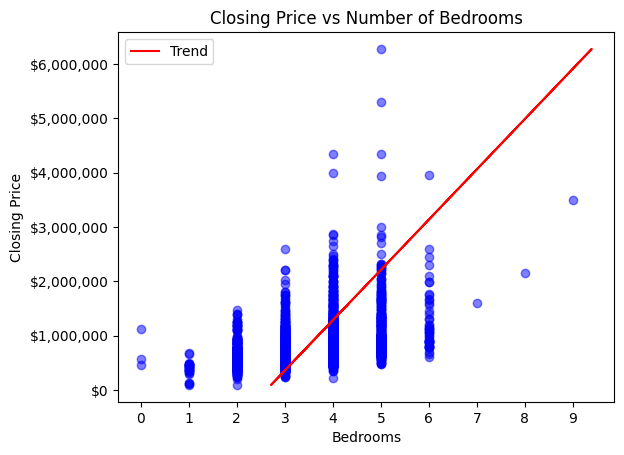

In [ ]:
closing_price = df['cprice']
number_bedrooms = df['bedrooms']

model = LinearRegression()
model.fit(closing_price.values.reshape(-1,1), number_bedrooms)
predictions_cprice_vs_bed = model.predict(closing_price.values.reshape(-1,1))

plt.scatter(number_bedrooms, closing_price, color='blue', alpha = 0.5)
plt.title('Closing Price vs Number of Bedrooms')
plt.ylabel('Closing Price')
plt.xlabel('Bedrooms')
plt.xticks(range(10))

formatter = mticker.FuncFormatter(price_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.plot(predictions_cprice_vs_bed, closing_price, color='red', label='Trend')
plt.legend()

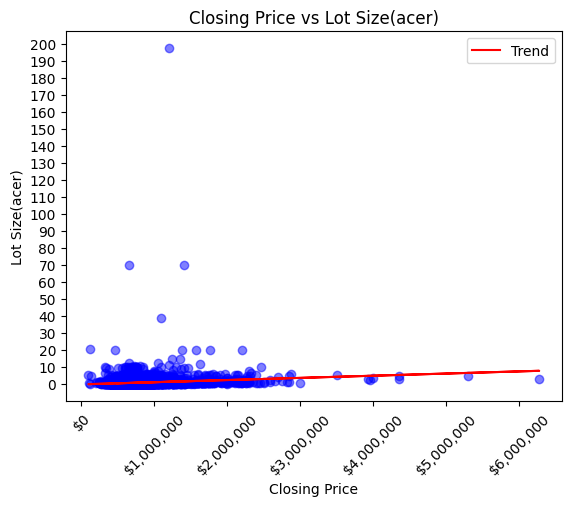

In [ ]:
closing_price = df['cprice']
lot_size_acer = df['lsacres']


model = LinearRegression()
model.fit(closing_price.values.reshape(-1,1), lot_size_acer)
predictions_cprice_vs_acer = model.predict(closing_price.values.reshape(-1,1))

plt.scatter(closing_price, lot_size_acer, color='blue', alpha = 0.5)
plt.title('Closing Price vs Lot Size(acer)')
plt.xlabel('Closing Price')
plt.ylabel('Lot Size(acer)')
plt.plot(closing_price, predictions_cprice_vs_acer, color='red', label='Trend')
tick_marks = np.arange(0,200+1,step=10)
plt.yticks(tick_marks)

formatter = mticker.FuncFormatter(price_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.tick_params(axis='x', labelrotation=45)

plt.legend()



Test

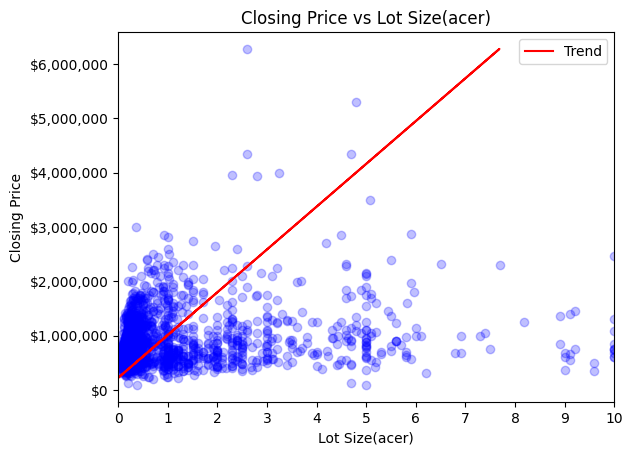

In [ ]:
closing_price = df['cprice']
lot_size_acer = df['lsacres']

model = LinearRegression()
model.fit(closing_price.values.reshape(-1,1), lot_size_acer)
predictions_cprice_vs_acer = model.predict(closing_price.values.reshape(-1,1))

plt.scatter(lot_size_acer, closing_price, color='blue', alpha = 0.25)
plt.title('Closing Price vs Lot Size(acer)')
plt.ylabel('Closing Price')
plt.xlabel('Lot Size(acer)')
plt.plot(predictions_cprice_vs_acer, closing_price, color='red', label='Trend')
plt.xlim(0, 10)
tick_marks = np.arange(0,10+1,step=1)
plt.xticks(tick_marks)

formatter = mticker.FuncFormatter(price_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()

DecisionTreeRegressor

253785.25220573143


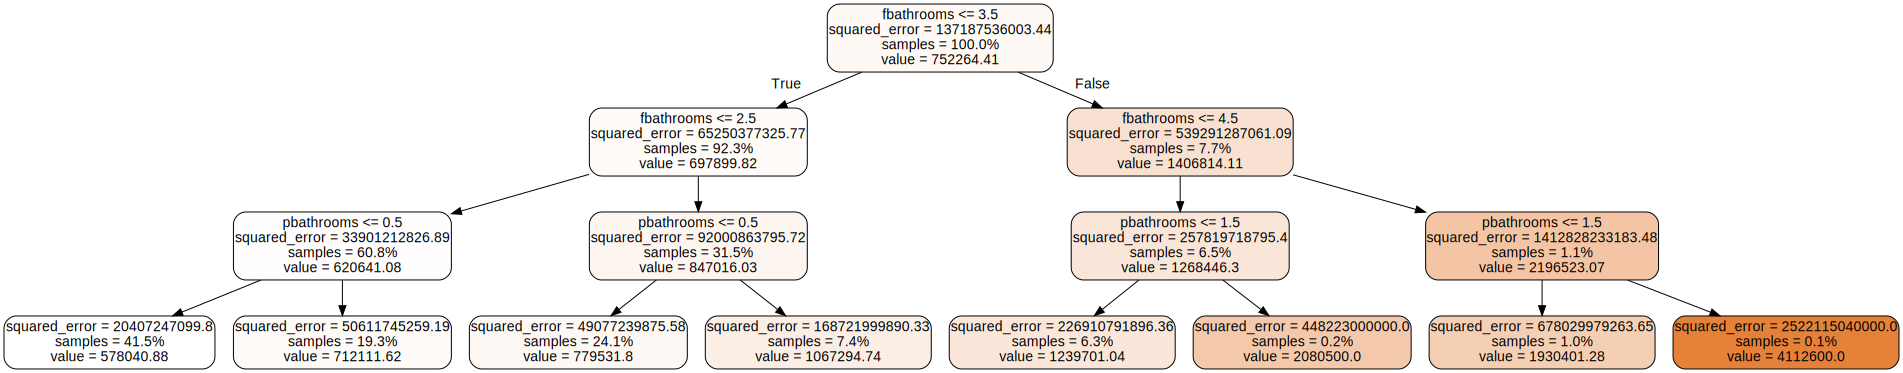

In [ ]:
predictors = ['bedrooms', 'fbathrooms', 'pbathrooms']
X = df[predictors].values
y = df['cprice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

mse = mean_squared_error(prediction, y_test)
rmse = np.sqrt(mse)
print(rmse)

dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph




KNN Regression

In [ ]:
predictors = ['bedrooms', 'fbathrooms', 'pbathrooms']
X = df[predictors].values
y = df['cprice'].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

ks = np.arange(1, 30, 2)
for k in ks:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)

  root_mse = np.sqrt(mean_squared_error(predictions, y_test))
  print('Test RMSE when k = {}: {:.2f}'.format(k, root_mse))

Test RMSE when k = 1: 324702.53
Test RMSE when k = 3: 285897.31
Test RMSE when k = 5: 248249.77
Test RMSE when k = 7: 244966.34
Test RMSE when k = 9: 245939.53
Test RMSE when k = 11: 242955.51
Test RMSE when k = 13: 243001.42
Test RMSE when k = 15: 243540.72
Test RMSE when k = 17: 242015.67
Test RMSE when k = 19: 242501.55
Test RMSE when k = 21: 241184.75
Test RMSE when k = 23: 240725.15
Test RMSE when k = 25: 240191.42
Test RMSE when k = 27: 241910.87
Test RMSE when k = 29: 239895.91


PolynomialFeatures


Test polyLR RMSE: 241746.21
Test polyKNNR RMSE: 272174.78


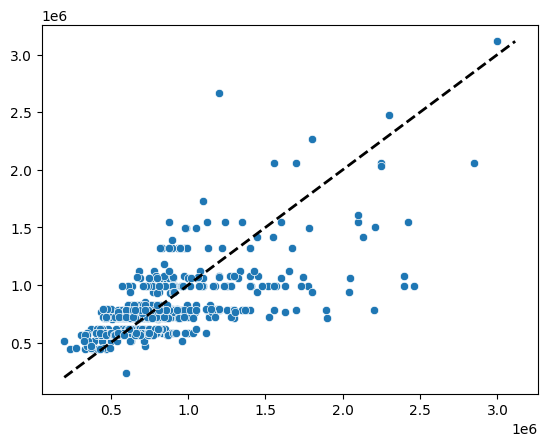

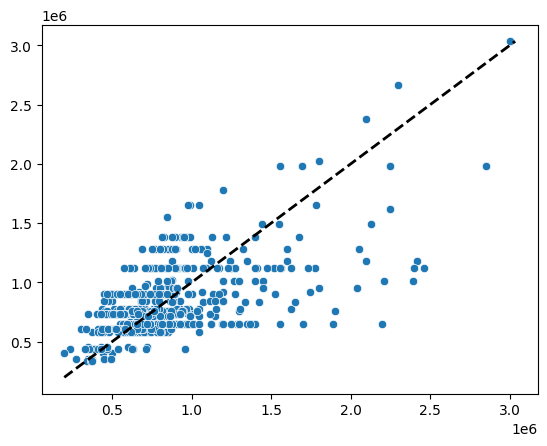

In [ ]:
pf = PolynomialFeatures(degree=3, include_bias=False)
pf.fit(X)
X_poly = pf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

polyLR = LinearRegression()
polyKNNR = KNeighborsRegressor()

polyLR.fit(X_train, y_train)
polyKNNR.fit(X_train, y_train)

polyLR_predictions = polyLR.predict(X_test)
polyKNNR_predictions = polyKNNR.predict(X_test)

polyLR_rmse = np.sqrt(mean_squared_error(polyLR_predictions, y_test))
polyKNNR_rmse = np.sqrt(mean_squared_error(polyKNNR_predictions, y_test))

print('Test polyLR RMSE: {:.2f}'.format(polyLR_rmse))
print('Test polyKNNR RMSE: {:.2f}'.format(polyKNNR_rmse))

sns.scatterplot(x=y_test, y=polyLR_predictions)
min_value = min(np.min(y_test), np.min(polyLR_predictions))
max_value = max(np.max(y_test), np.max(polyLR_predictions))
plt.plot([min_value, max_value], [min_value, max_value], linewidth=2, linestyle='dashed', color='black')
plt.show()

sns.scatterplot(x=y_test, y=polyKNNR_predictions)
min_value = min(np.min(y_test), np.min(polyKNNR_predictions))
max_value = max(np.max(y_test), np.max(polyKNNR_predictions))
plt.plot([min_value, max_value], [min_value, max_value], linewidth=2, linestyle='dashed', color='black')